Исследуемый датасет содержит информацию по заработным платам специалистов с разными должностями в сфере информационной безопасности. Датасет содержит следующие колонки:
*   work_year - год, в течение которого специалист работал и получил зарплату
*   experience level - уровень опыта специалиста
*   employment type - тип занятости специалиста
*   job_title - должность специалиста
*   salary - зарплата специалиста в определенной валюте
*   salary_currency - валюта, в которой зарплата была выплачена
*   salary_in_usd - должность специалиста
*   employee_residence - страна проживания специалиста
*   remote_ratio - процент удаленного режима работы специалиста
*   company_location - страна, в которой располагается главный офис компании
*   company_size - размер компании


















In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv('/content/sample_data/salaries.csv')

#Выведем справочную информацию о датасете
print()
print("Размер датасета:",data.shape)
print()
print("Вид датасета:",data.head(),sep = '\n')
print()
print("Отсутствующие значения:",data.isna().sum(),sep = '\n')
print()
print("Основная информация:")
print(data.info())
print("Основная статистика:", data.describe(),sep = '\n')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Размер датасета: (4501, 11)

Вид датасета:
   work_year experience_level employment_type                     job_title  \
0       2023               EX              FT  Information Security Officer   
1       2023               EX              FT  Information Security Officer   
2       2023               SE              FT             Security Engineer   
3       2023               SE              FT             Security Engineer   
4       2023               SE              FT             Security Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  160000             USD         160000                 US           100   
1  100000             USD         100000                 US           100   
2  247250             USD         247250                 US             0   
3  160000             USD         160000    

In [ ]:
#Датасет содержит 3 числовые переменные и 8 категориальных. Разделим признаки на категориальные и числовые:
cat_columns = ['work_year','experience_level','employment_type','job_title',
               'salary_currency','employee_residence','company_location','company_size']
num_columns = ['salary','salary_in_usd','remote_ratio']

In [7]:
#Определим, с какой частотой встречается каждое значение каждого признака в датасете:
for column in data:
  print(data[column].value_counts())
  print('\n')

2023    2783
2022    1066
2021     475
2020     177
Name: work_year, dtype: int64


SE    3021
MI     950
EN     339
EX     191
Name: experience_level, dtype: int64


FT    4470
PT      15
CT      12
FL       4
Name: employment_type, dtype: int64


Security Engineer                        1761
Security Analyst                          273
DevSecOps Engineer                        237
Cyber Security Analyst                    165
Security Architect                        118
                                         ... 
Information System Security Engineer        1
DLP Security Engineer                       1
Business Information Security Officer       1
Systems Security Engineer                   1
Concierge Security Engineer                 1
Name: job_title, Length: 125, dtype: int64


120000    121
150000    110
100000    107
130000     98
140000     95
         ... 
171700      1
89600       1
233840      1
134300      1
66310       1
Name: salary, Length: 922, dtype: int64


USD 

In [8]:
#Выведем основную информацию о зарплатах:
data['salary_in_usd'].describe()

count      4501.000000
mean     145772.431015
std       63662.350778
min       15897.000000
25%      100000.000000
50%      137600.000000
75%      180000.000000
max      456621.000000
Name: salary_in_usd, dtype: float64

Как видно, максимальный уровень зарплаты - 456621 USD, минимальный - 15897 USD. Определим, какие должности занимали специалисты с данными окладами.

In [15]:
print('Должность специалиста с максимальным зарегистрированным уровнем оклада:')
print(data[data['salary_in_usd'] == data['salary_in_usd'].max()]['job_title'])
print()
print('Должность специалиста с минимальным зарегистрированным уровнем оклада:')
print(data[data['salary_in_usd'] == data['salary_in_usd'].min()]['job_title'])

Должность специалиста с максимальным зарегистрированным уровнем оклада:
4495    Ethical Hacker
Name: job_title, dtype: object

Должность специалиста с минимальным зарегистрированным уровнем оклада:
3092    Security Consultant
Name: job_title, dtype: object


Text(0.5, 0, 'Частота')

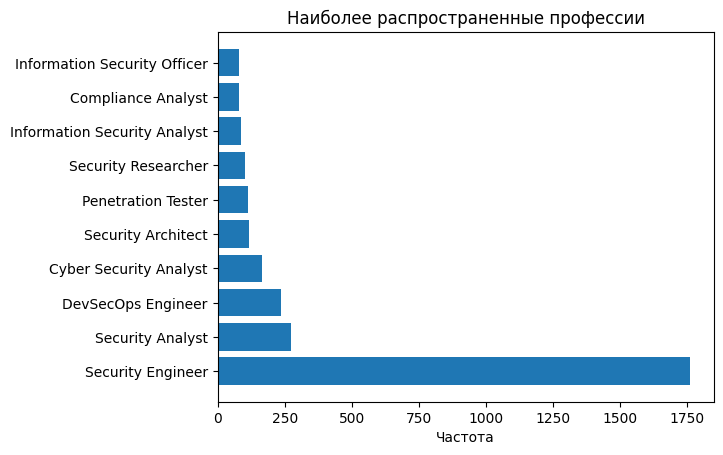

In [4]:
#Выведем наиболее часто встречающиеся профессии:
top_jobs = data['job_title'].value_counts().head(10)
plt.barh(top_jobs.index,top_jobs.values)
plt.title("Наиболее распространенные профессии")
plt.xlabel("Частота")

Самые распространенные профессии - Security Engineer, Security Analyst и DevSecOps Engineer, причем должность Security Engineer имеет огромный отрыв от остальных должностей

Text(0.5, 0, 'Средняя зарплата')

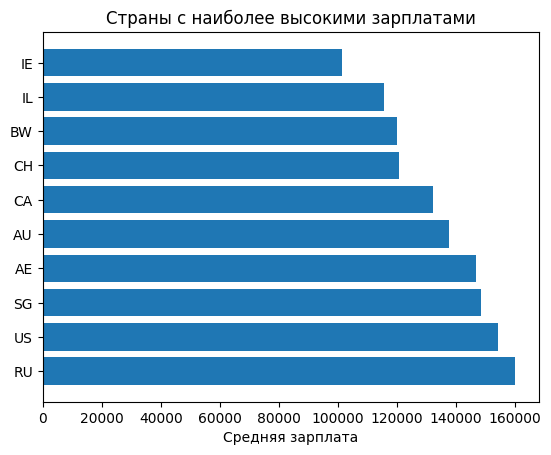

In [17]:
#Выведем топ стран, в которых средние зарплаты максимальны:
top_countries = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending = False).head(10)
plt.barh(top_countries.index,top_countries.values)
plt.title("Страны с наиболее высокими зарплатами")
plt.xlabel("Средняя зарплата")

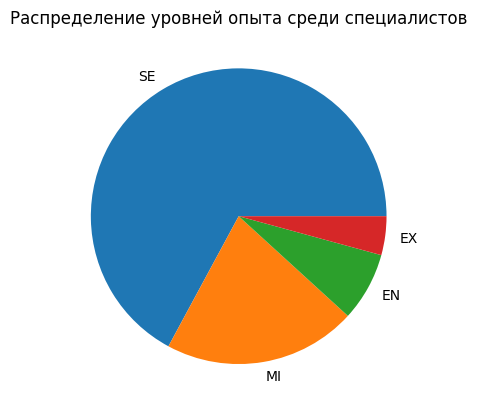

In [18]:
#Посмотрим на соотношение уровней опыта среди специалистов:
exp_level = data['experience_level'].value_counts()
labels = data['experience_level'].value_counts().index
plt.pie(exp_level,labels = labels)
plt.title('Распределение уровней опыта среди специалистов')
plt.show()

Как видно, среди опрашиваемых специалистов преобладают специалисты уровня SE (Senior level), в то время как специалисты уровня EX (Executive level) наименее распространены.

In [16]:
#Построим распределение зарплат в зависимости от опыта сотрудников:
fig = px.box(data, x = data['experience_level'], y = data['salary_in_usd'],
             color = 'experience_level', title = 'Распределение зарплат специалистов в зависимости от опыта')
fig.show()


In [6]:
#Построим распределение зарплат в зависимости от формата работы сотрудников - очный, гибридный или удаленный.
fig = px.box(data, x = data['remote_ratio'],y = [data['salary_in_usd']],
             title ='Распределение зарплат специалистов в зависимости от формата работы')
fig.show()

Меньше всего платят сотрудникам, работающим гибридно, и больше всего - сотрудникам на полностью очном формате работы.

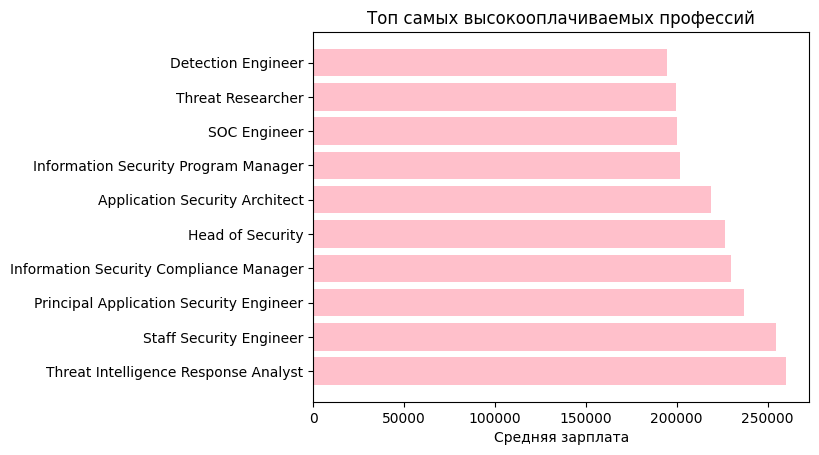

In [5]:
#Определим теперь самые высокооплачиваемые профессии
p = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False).head(10)
plt.barh(p.index,p.values, color = 'pink')
plt.xlabel("Средняя зарплата")
plt.title("Топ самых высокооплачиваемых профессий")
plt.show()

Распределение самых высокооплачиваемых профессий достаточно плавное - разница в окладах между соседними профессиями небольшая.

Из данного анализа можем вынести следующие инсайты:

1. На рынке больше всего специалистов уровня Senior level;
2. Наиболее высокий оклад у специалистов, работающих в российских компаниях;
3. Сотрудники, занимающие должности, не предполагающие удаленный формат работы, имеют более высокий уровень зарплат;
4. Самая высокооплачиваемая должность - Threat Intelligence Response Analyst;
5. Наиболее ощутимая разница в доходах у специалистов с одинаковым уровнем опыта наблюдается у наиболее опытных специалистов уровня EX, в то время как наименьшую разницу в уровне дохожа имеют начинающие специалисты уровня EN.
